<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Logistic_Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x1 = np.arange(50)
x2 = np.random.rand(x1.size) * 50

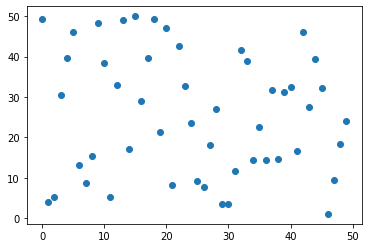

In [6]:
plt.scatter(x1, x2)

In [7]:
x1 > x2

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [9]:
y = np.where(x1 > x2, 0, 1)

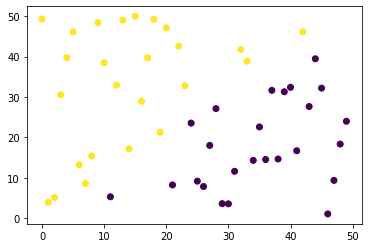

In [10]:
plt.scatter(x1, x2, c = y)

In [13]:
X = np.dstack([x1, x2])[0]

In [14]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression()
logR.fit(X, y)

LogisticRegression()

In [15]:
logR.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


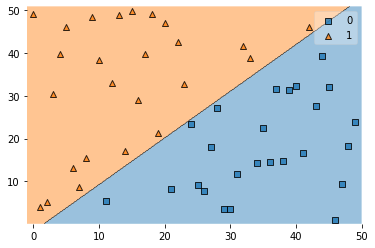

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf = logR)

In [17]:
logR.coef_

array([[-0.96104499,  0.87906538]])

In [18]:
logR.intercept_

array([1.49346441])

In [31]:
from IPython.display import clear_output

In [32]:
class CustomLogisticReg():
  def __init__(self, learning_rate, iteration):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def fit(self, X, y):
    row, col = X.shape
    self.W = np.random.rand(col)
    self.b = np.random.rand()

    for i in range(self.iteration):
      dist = X.dot(self.W) + self.b
      y_pred = self.sigmoid(dist)

      dw = (X.T).dot(y_pred - y) / row
      db = (y_pred - y).sum() / row

      self.W = self.W - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

      # ploting
      clear_output(wait = True)
      x1 = np.array([0, 50])
      x2 = -(self.W[0] * x1 + self.b) / self.W[1]

      plt.scatter(X[:, 0], X[:, 1], c = y)
      plt.plot(x1, x2)
      plt.title("Iteration " + str(i))
      plt.show()

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def predict(self, X):
    dist = X.dot(self.W) + self.b
    y_pred = self.sigmoid(dist)

    return np.round(y_pred)

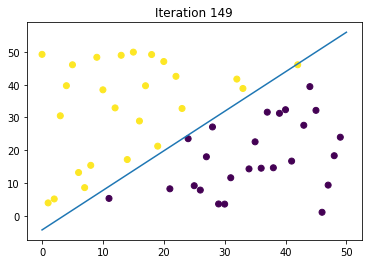

In [34]:
logC = CustomLogisticReg(0.001, 150)
logC.fit(X, y)

In [25]:
logC.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
def get_y(x):
  if(x < 10):
    return 1
  elif(x < 30):
    return 2
  else:
    return 3

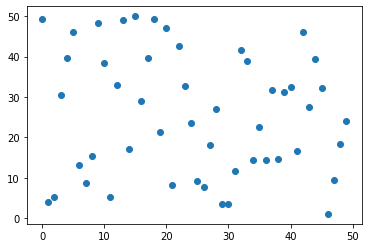

In [36]:
plt.scatter(x1, x2)

In [39]:
y = np.array(list(map(get_y, x1)))

In [40]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

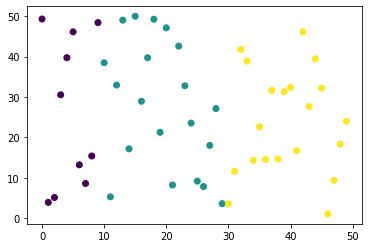

In [41]:
plt.scatter(x1, x2, c = y)

In [42]:
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(multi_class = "multinomial")
logR.fit(X, y)

LogisticRegression(multi_class='multinomial')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


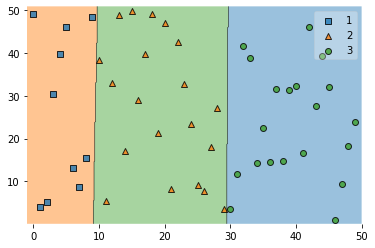

In [43]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf = logR)